<a href="https://colab.research.google.com/github/Eliascc5/English_proficiency_prediction_NLP/blob/main/projet_IAS_partie2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#As in the first stage -> we load our dataset from Drive 
#Dataset: NICT_JLE_4.1
#Reference: https://alaginrc.nict.go.jp/nict_jle/index_E.html

from google.colab import drive
drive.mount("/content/gdrive")

#----------------------------------


Mounted at /content/gdrive


In [2]:
import os

path_test= r'/content/gdrive/MyDrive/NICT_JLE_4.1/Output/'
os.chdir(path_test)

vocabulary=[]
y_output=[]

for file in os.listdir():
  if file.endswith(".txt"):

    file_path = f"{path_test}/{file}"

    with open(file_path, mode='r',encoding="utf8",errors='ignore') as f:

      score = f.readline()
      content = f.read()

      vocabulary.append(content)

      y_output.append(int(score))

      f.close

######################################

**NOTE:** We create a general vocabulary from the transcription of all the candidates so that it is as general as possible. 

Basically the "vocabulary" list contains in each element the transcription of each candidate.  In other words -> len (vocabulary) = 1281 

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [10]:
#TODO: il faut nettoyer 
from sklearn.feature_extraction.text import CountVectorizer

# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer() 
# tokenize and build vocab
vectorizer.fit(vocabulary)  #(Learn a vocabulary dictionary of all tokens in the raw documents.)
# summarize
print(vectorizer.vocabulary_)

#print(vectorizer.get_feature_names())

# encode document
vector = vectorizer.transform(vocabulary)
# summarize encoded vector

print(vector.shape)
#print(type(vector))
#print(vector.toarray())

{'mh': 8195, 'hmm': 5877, 'ur': 14245, 'my': 8591, 'name': 8656, 'is': 6556, 'fine': 4697, 'and': 472, 'you': 15052, 'oh': 9262, 'lives': 7645, 'in': 6280, 'uh': 14029, 'live': 7640, 'urn': 14264, 'er': 4200, 'nearby': 8869, 'this': 13504, 'office': 9250, 'erm': 4215, 'maybe': 8051, 'three': 13519, 'or': 9408, 'four': 4891, 'years': 14993, 'think': 13485, 'yes': 15006, 'wife': 14775, 'son': 12387, 'daughter': 3169, 'yeah': 14989, 'hm': 5875, 'he': 5681, 'five': 4743, 'old': 9316, 'mm': 8355, 'she': 11785, 'two': 13995, 'last': 7401, 'weekend': 14681, 'went': 14704, 'to': 13594, 'shopping': 11952, 'for': 4835, 'their': 13445, 'christmas': 2260, 'present': 10254, 'uu': 14315, 'do': 3617, 'know': 7168, 'eh': 3973, 'ee': 3938, 'kind': 7105, 'of': 9241, 'animations': 492, 'character': 2072, 'wants': 14585, 'uhm': 14042, 'the': 13437, 'figure': 4666, 'ultrazaurusu': 14070, 'want': 14581, 'imita': 6233, 'th': 13419, 'imitation': 6236, 'refrigera': 10766, 'refrigerate': 10767, 'refrigerator': 

**Here we start with the Neural Network**


In [41]:
15157*0.2
n = len(vocabulary)
print(n)

1281


Epoch 1/35
2/2 [==============================] - 3s 971ms/step - loss: 2.4141 - accuracy: 0.0323 - val_loss: 1.6658 - val_accuracy: 0.4453
Epoch 2/35
2/2 [==============================] - 2s 707ms/step - loss: 1.8275 - accuracy: 0.3611 - val_loss: 1.5927 - val_accuracy: 0.4453
Epoch 3/35
2/2 [==============================] - 2s 684ms/step - loss: 1.8134 - accuracy: 0.3567 - val_loss: 1.5643 - val_accuracy: 0.4453
Epoch 4/35
2/2 [==============================] - 2s 688ms/step - loss: 1.8037 - accuracy: 0.3562 - val_loss: 1.5437 - val_accuracy: 0.4453
Epoch 5/35
2/2 [==============================] - 2s 705ms/step - loss: 1.7765 - accuracy: 0.3562 - val_loss: 1.5339 - val_accuracy: 0.4453
Epoch 6/35
2/2 [==============================] - 2s 698ms/step - loss: 1.7529 - accuracy: 0.3620 - val_loss: 1.5253 - val_accuracy: 0.4453
Epoch 7/35
2/2 [==============================] - 2s 729ms/step - loss: 1.7349 - accuracy: 0.3589 - val_loss: 1.5084 - val_accuracy: 0.4453
Epoch 8/35
2/2 [====

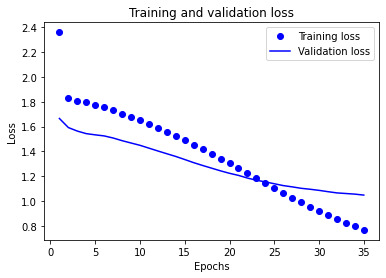

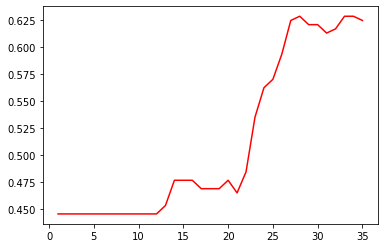

In [110]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras.utils import np_utils
import tensorflow as tf
import numpy as np

#######################################
n = len(vocabulary)   #Number of candidates 1281
m = 15157  #Number of words without repetition of our vocabulary 

array=vector.toarray()                      #INPUT

array_output = np.array(y_output)           #OUTPUT

array_output = np_utils.to_categorical(array_output) 

array_output = array_output[:,1:10]


########################################

model = models.Sequential()

model.add(layers.Dense(2273, activation='sigmoid', input_shape=(m,)))
model.add(layers.Dense(341, activation='sigmoid'))
model.add(layers.Dense(51, activation='sigmoid'))
model.add(layers.Dense(9, activation='softmax'))



model.compile(optimizer= 'adam',    #rmsprop  // adam
              loss='categorical_crossentropy',
              metrics=['accuracy'])



######################################################################
#Percentage of validation set (20% candidates)


N_val = round(0.2*n)

x_val_array=array[:N_val]  
y_val = array_output[:N_val]

x_train_array = array[N_val:]
y_train_array = array_output[N_val:]


history = model.fit(x_train_array,
                    y_train_array,
                    epochs=35,
                    batch_size=750,
                    validation_data=(x_val_array, y_val))

#plot the results :
history_dict = history.history

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs,val_acc ,'r', label='Validation acc')
plt.show()


In [112]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 2273)              34454134  
_________________________________________________________________
dense_111 (Dense)            (None, 341)               775434    
_________________________________________________________________
dense_112 (Dense)            (None, 51)                17442     
_________________________________________________________________
dense_113 (Dense)            (None, 9)                 468       
Total params: 35,247,478
Trainable params: 35,247,478
Non-trainable params: 0
_________________________________________________________________


**Performance analysis**

In [114]:
x_test_array = x_val_array
y_test = y_val

predictions= model.predict(x_test_array) 
list = []
for i in range(len(x_test_array)):
  #print("Prediction: ", np.argmax(predictions[i])+1)  #add +1 to start in 1
  #print("Label of x_test", y_test[i])
  #print("------------------")

  if (y_test[i].argmax() == np.argmax(predictions[i])):
    list.append(1);


print("Final accuracy :", sum(list) / len(x_test_array))

  

Final accuracy : 0.625


Reference : https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python

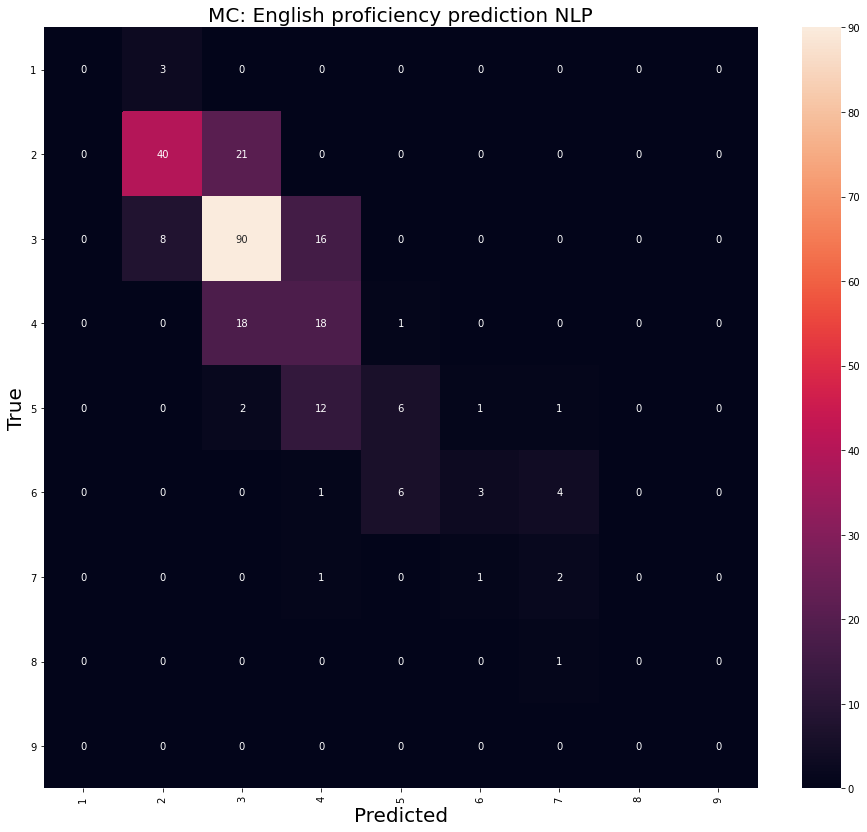

In [111]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = [1,2,3,4,5,6,7,8,9]

cm = confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(predictions,axis=-1),labels=class_names)



# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('MC: English proficiency prediction NLP', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()